#  [Exploration] üòÄMLOps Í∏∞Ï¥à

---

CIFAR10 ÌîÑÎ°úÏ†ùÌä∏Î•º Í∏∞Î∞òÏúºÎ°ú Îç∞Ïù¥ÌÑ∞Î•º ÏàòÏ†ïÌïòÍ≥† ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÏùÑ Ìïú Îã§Ïùå Î∞∞Ìè¨Ìï¥Î≥¥Ïûê!

<br>  
<br>  
<br>

---

<br>  

## üî∂1. Î™®Îç∏ Í≥†Ï†ïÌï¥ÏÑú ÏÇ¨Ïö©ÌïòÍ∏∞  
Ïù¥Î≤à CIFAR10 ÌîÑÎ°úÏ†ùÌä∏Ïùò Í≤ΩÏö∞ÏóêÎäî Î™®Îç∏ÏùÑ Í≥†Ï†ïÌï¥ÏÑú ÏÇ¨Ïö©Ìï† ÏòàÏ†ïÏù¥Îã§. Î™®Îç∏Ïùò Í≤ΩÏö∞ÏóêÎäî Îã§ÏùåÍ≥º Í∞ôÏùÄ Í∑∏Î¶ºÏúºÎ°ú Íµ¨ÏÑ±  
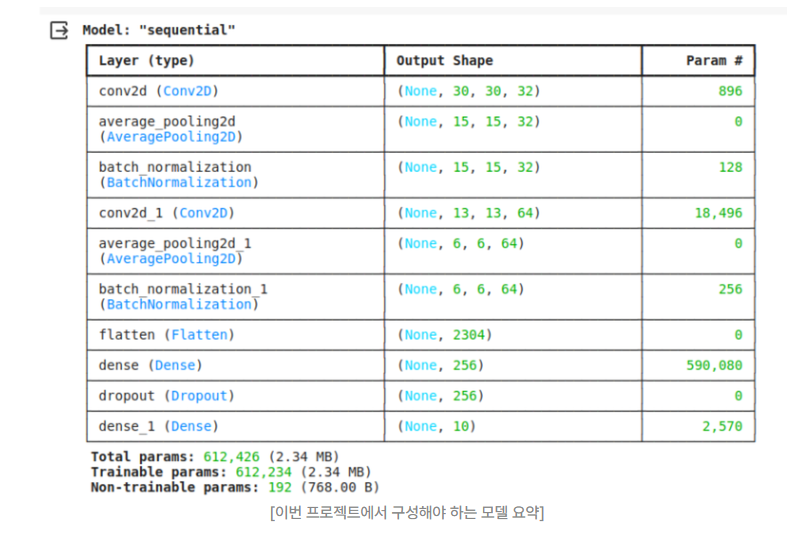

In [36]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Îç∞Ïù¥ÌÑ∞ Î°úÎìú
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Îç∞Ïù¥ÌÑ∞ Ï†ÑÏ≤òÎ¶¨
train_images, test_images = train_images / 255.0, test_images / 255.0
train_labels, test_labels = to_categorical(train_labels), to_categorical(test_labels)

In [37]:
# Î™®Îç∏ Íµ¨Ï∂ï
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.AveragePooling2D((2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(10, activation='softmax'))

# Î™®Îç∏ Ïª¥ÌååÏùº
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Î™®Îç∏ ÏöîÏïΩ
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [38]:
# Î™®Îç∏ ÌïôÏäµ
history = model.fit(train_images, train_labels, epochs=10, validation_data=(test_images, test_labels))

# ÌïôÏäµ Í≥ºÏ†ï ÏãúÍ∞ÅÌôî
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))


Epoch 1/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.5194 - accuracy: 0.4907 - val_loss: 1.3462 - val_accuracy: 0.5329
Epoch 2/10
1563/1563 [==============================] - 6s 4ms/step - loss: 1.0657 - accuracy: 0.6257 - val_loss: 1.1077 - val_accuracy: 0.6153
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9140 - accuracy: 0.6797 - val_loss: 0.9901 - val_accuracy: 0.6580
Epoch 4/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.7942 - accuracy: 0.7218 - val_loss: 0.8933 - val_accuracy: 0.6950
Epoch 5/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6899 - accuracy: 0.7579 - val_loss: 0.8828 - val_accuracy: 0.7029
Epoch 6/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6131 - accuracy: 0.7831 - val_loss: 1.1073 - val_accuracy: 0.6642
Epoch 7/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.5443 - accuracy: 0.8096 - val_loss: 1.0044 - val_accuracy:

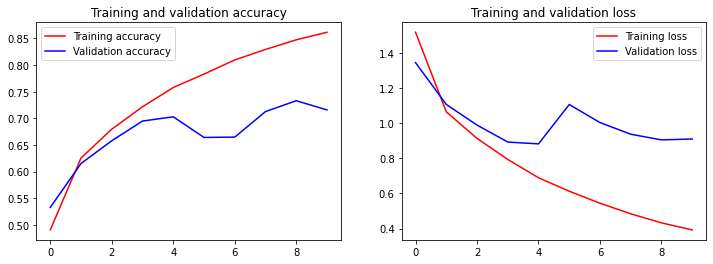

In [39]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# Î™®Îç∏ Ï†ÄÏû•
model.save("cifar10_justmodel.h5")

---

<br>  
<br>  
<br>  
<br>  

## 2. üî∂Data Centric AI ÎßõÎ≥¥Í∏∞

---  

<br>  

Data Centric AIÎ•º Ï†ïÏÑùÏ†ÅÏúºÎ°ú ÏßÑÌñâÌïúÎã§Î©¥ ÌõàÎ†® Îç∞Ïù¥ÌÑ∞ÏÖãÍ≥º ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ Ï†ÑÎ∂Ä Ïó¥Ïñ¥ÏÑú ÌôïÏù∏Ìï¥ÏÑú ÌãÄÎ¶∞ Í≤ÉÏù¥ ÏóÜÎäîÏßÄ Í≤ÄÏàòÌï¥Ïïº ÌïúÎã§.  
ÌïòÏßÄÎßå Ïö∞Î¶¨ÏóêÍ≤åÎäî ÏùºÏùºÏù¥ Ìï¥Î≥ºÎßåÌïú ÏãúÍ∞ÑÏùÄ Ï°¥Ïû¨ÌïòÏßÄ ÏïäÏúºÎãà ÏÇ¨ÎûåÎì§Ïù¥ ÎØ∏Î¶¨ Í≤ÄÏàòÌñàÎçò ÎÇ¥Ïö©Îì§ÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌîÑÎ°úÏ†ùÌä∏Î•º ÏßÑÌñâÌïòÍ≤†Îã§.  

<br>  

`labelerrors.com`ÏùÄ **Data Centric AI**ÏóêÏÑú Í∞ÄÏû• ÎßéÏù¥ ÌôúÏö©ÌïòÍ≥† ÏûàÎäî ÌååÏù¥Ïç¨ ÎùºÏù¥Î∏åÎü¨Î¶¨Ïù∏ cleanlabÏùÑ ÎßåÎì† Í∞úÎ∞úÏûêÎì§Ïù¥ Í≥µÍ∞úÌïú ÏÇ¨Ïù¥Ìä∏Ïù¥Îã§. `labelerrors.com`ÏùÄ Ïù¥Î¶ÑÏóêÏÑú Ïïå Ïàò ÏûàÎìØÏù¥ **ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞**ÏôÄ labelÏù¥ ÏûòÎ™ª Î∂ôÏñ¥ ÏûàÎäî ÏÇ¨Î°ÄÎ•º Î™®ÏïÑ Î≥¥Ïó¨Ï§ÄÎã§.
`labelerrors.com`ÏóêÏÑú CIFAR10 ÌÖåÏä§Ìä∏ Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÌôïÏù∏ÌïòÍ≥† ÏïÑÎûò Ï°∞Í∑∏Îß£Í≤å ÏûàÎäî IDÎ•º Í∏∞Ï§ÄÏúºÎ°ú ÏßÅÏ†ë Îç∞Ïù¥ÌÑ∞ÏÖãÏùÑ ÏãúÍ∞ÅÌôîÌïòÍ≥† Ïã§Ï†ú labelÏù¥ ÏûòÎ™ª Î∂ôÏñ¥ÏûàÎã§Î©¥ labelÏùÑ ÏàòÏ†ïÌï¥Î≥¥Ïûê.

In [64]:
import tensorflow as tf
from tensorflow.keras import datasets, models
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
(_, _), (test_images, test_labels) = datasets.cifar10.load_data()
test_images = test_images / 255.0  # Ïù¥ÎØ∏ÏßÄ Ï†ïÍ∑úÌôî

# Î™®Îç∏ Î°úÎìú
model = models.load_model("cifar10_justmodel.h5")

# CIFAR-10 ÌÅ¥ÎûòÏä§ Î™©Î°ù
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# ÏòàÏ∏° ÏàòÌñâ
predictions = model.predict(test_images)

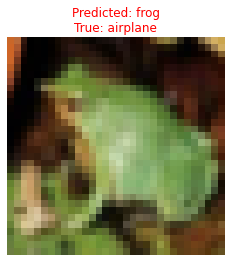

In [66]:
# 2405Î≤àÏß∏ Ïù¥ÎØ∏ÏßÄ ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
image_id = 2405
predicted_label = np.argmax(predictions[image_id])
true_label = np.argmax(test_labels[image_id])

# Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî
plt.imshow(test_images[image_id])
plt.title(f'Predicted: {class_names[predicted_label]}\nTrue: {class_names[true_label]}', color='green' if predicted_label == true_label else 'red')
plt.axis('off')
plt.show()

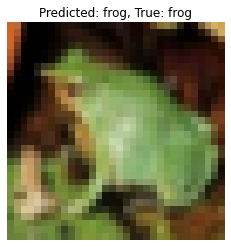

In [68]:
# ÏàòÏ†ï Ï†Ñ Ïù¥ÎØ∏ÏßÄ IDÏóê ÎåÄÌïú ÏàòÏ†ï ÌõÑ ÎùºÎ≤®
modify_data = {
    6877: 8,  # "ship"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 8
    8058: 7,  # "horse"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 7
    2532: 1,  # "automobile"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 1
    7657: 7,  # "horse"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 7
    1969: 9,  # "truck"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 9
    2804: 5,  # "dog"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 5
    6792: 9,  # "truck"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 9
    1227: 5,  # "dog"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 5
    5191: 5,  # "dog"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 5
    5690: 4,  # "deer"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 4
    1718: 8,  # "ship"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 8
    2592: 4,  # "deer"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 4
    4794: 2,  # "bird"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 2
    5960: 3,  # "cat"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 3
    165: 2,   # "bird"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 2
    9227: 1,  # "automobile"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 1
    5632: 5,  # "dog"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 5
    9352: 9,  # "truck"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 9
    7846: 3,  # "cat"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 3
    6966: 8,  # "ship"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 8
    5468: 3   # "cat"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 3
}
# ÏàòÏ†ï ÌõÑÏùò ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
for image_id in modify_data.keys():
    predicted_label = np.argmax(predictions[image_id])
    true_label = test_labels[image_id, 0]

    # Ïù¥ÎØ∏ÏßÄ ÏãúÍ∞ÅÌôî
    plt.imshow(test_images[image_id])
    plt.title(f'Predicted: {class_names[predicted_label]}, True: {class_names[true_label]}')
    plt.axis('off')
    plt.show()

- ÏùºÎã® Í∞úÍµ¨Î¶¨ ÌïòÎÇòÎäî label ÏàòÏ†ï ÏôÑÎ£å!

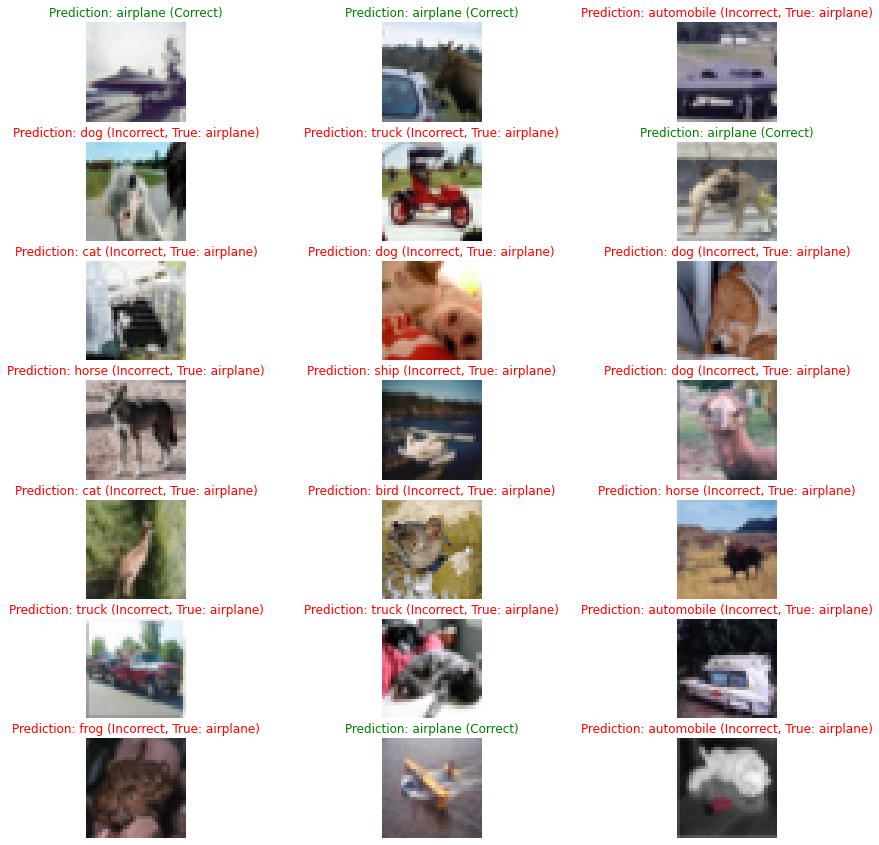

In [93]:
import numpy as np

# CIFAR-10 ÌÅ¥ÎûòÏä§ Î™©Î°ù
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# ÏÑ†ÌÉùÌïú Ïù¥ÎØ∏ÏßÄÏùò Ïù∏Îç±Ïä§
indices_to_visualize = [6877, 8058, 2532, 7657, 1969, 2804, 6792, 1227, 5191, 5690, 1718, 2592, 4794, 5960, 165, 9227, 5632, 9352, 7846, 6966, 5468]

# ÏÑ†ÌÉùÌïú Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® Ï∂îÏ∂ú
selected_images = test_images[indices_to_visualize]
true_labels = np.argmax(test_labels[indices_to_visualize], axis=1)

# Î™®Îç∏ÏóêÏÑú ÏòàÏ∏°Ìïú ÎùºÎ≤® Í∞ÄÏ†∏Ïò§Í∏∞
predicted_labels = np.argmax(model.predict(selected_images), axis=1)

# Ïù¥ÎØ∏ÏßÄ Î∞è ÏòàÏ∏°/Ïã§Ï†ú ÎùºÎ≤® ÏãúÍ∞ÅÌôî
num_images = len(indices_to_visualize)
rows = 7  
cols = 3

plt.figure(figsize=(15, 15))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    
    # Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
    plt.imshow(selected_images[i])
    plt.axis('off')
    
    
    # ÏòàÏ∏° Î∞è Ïã§Ï†ú ÎùºÎ≤® ÌëúÏãú
    if predicted_labels[i] == true_labels[i]:
        plt.title(f'Prediction: {class_names[predicted_labels[i]]} (Correct)', color='green')
    else:
        plt.title(f'Prediction: {class_names[predicted_labels[i]]} (Incorrect, True: {class_names[true_labels[i]]})', color='red')

plt.show()

In [146]:
import tensorflow as tf
from tensorflow.keras import datasets, models
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt

# CIFAR-10 Îç∞Ïù¥ÌÑ∞ÏÖã Î°úÎìú
(_, _), (test_images, test_labels) = datasets.cifar10.load_data()
test_images = test_images / 255.0  # Ïù¥ÎØ∏ÏßÄ Ï†ïÍ∑úÌôî

# Î™®Îç∏ Î°úÎìú
model = models.load_model("cifar10_justmodel.h5")

# CIFAR-10 ÌÅ¥ÎûòÏä§ Î™©Î°ù
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# ÏàòÏ†ïÌï† Ïù¥ÎØ∏ÏßÄÏùò IDÏôÄ ÏàòÏ†ïÎêú Î†àÏù¥Î∏î
modify_data = {
    6877: 8,  # "ship"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 8
    8058: 7,  # "horse"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 7
    2532: 1,  # "automobile"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 1
    7657: 7,  # "horse"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 7
    1969: 9,  # "truck"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 9
    2804: 5,  # "dog"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 5
    6792: 9,  # "truck"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 9
    1227: 5,  # "dog"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 5
    5191: 5,  # "dog"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 5
    5690: 4,  # "deer"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 4
    1718: 8,  # "ship"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 8
    2592: 4,  # "deer"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 4
    4794: 2,  # "bird"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 2
    5960: 3,  # "cat"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 3
    165: 2,   # "bird"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 2
    9227: 1,  # "automobile"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 1
    5632: 5,  # "dog"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 5
    9352: 9,  # "truck"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 9
    7846: 3,  # "cat"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 3
    6966: 8,  # "ship"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 8
    5468: 3   # "cat"Ïùò ÌÅ¥ÎûòÏä§ IDÎäî 3
}

# # ÏàòÏ†ïÎêú Î†àÏù¥Î∏îÎ°ú Îç∞Ïù¥ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏
# for img_id, new_label in modify_data.items():
#     test_labels[img_id] = to_categorical(new_label, num_classes=len(class_names))

# ÏàòÏ†ïÎêú Î†àÏù¥Î∏îÎ°ú Îç∞Ïù¥ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏
for img_id, new_label in modify_data.items():
    # Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú Î†àÏù¥Î∏î ÏóÖÎç∞Ïù¥Ìä∏
    test_labels[img_id] = to_categorical(new_label, num_classes=len(class_names))[0]

#     # Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú ÏòàÏ∏° ÏàòÌñâ
#     img = test_images[img_id].reshape(1, *test_images[img_id].shape)  # Î™®Îç∏Ïùò ÏûÖÎ†• ÌòïÌÉúÏóê ÎßûÍ≤å reshape
#     predicted_label = np.argmax(model.predict(img), axis=1)[0]

#     # ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
#     print(f"Image ID: {img_id}, Predicted Label: {class_names[predicted_label]}, True Label: {class_names[new_label]}")

In [147]:
# # Ïù¥ÎØ∏ÏßÄ Î∞è ÏòàÏ∏°/Ïã§Ï†ú ÎùºÎ≤® ÏãúÍ∞ÅÌôî (ÏóÖÎç∞Ïù¥Ìä∏Îêú ÎùºÎ≤® Í∏∞Ï§Ä)
# plt.figure(figsize=(15, 15))

# for i in range(num_images):
#     plt.subplot(rows, cols, i + 1)
    
#     # Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
#     plt.imshow(selected_images[i])
#     plt.axis('off')
    
#     # ÏóÖÎç∞Ïù¥Ìä∏Îêú ÎùºÎ≤® ÌëúÏãú
#     updated_label = np.argmax(test_labels[indices_to_visualize[i]])
    
#     # ÏòàÏ∏° Î∞è Ïã§Ï†ú ÎùºÎ≤® ÌëúÏãú
#     if predicted_labels[i] == updated_label:
#         plt.title(f'Prediction: {class_names[predicted_labels[i]]} (Correct)', color='green')
#     else:
#         plt.title(f'Prediction: {class_names[predicted_labels[i]]} (Incorrect, Updated: {class_names[updated_label]})', color='red')

# plt.show()



- Î∏åÎ°úÎìúÏ∫êÏä§ÌåÖ Î¨∏Ï†úÎäî Ìï¥Í≤∞ÎêêÎäîÎç∞ Îç∞Ïù¥ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏Í∞Ä ÏïàÎêêÎã§.

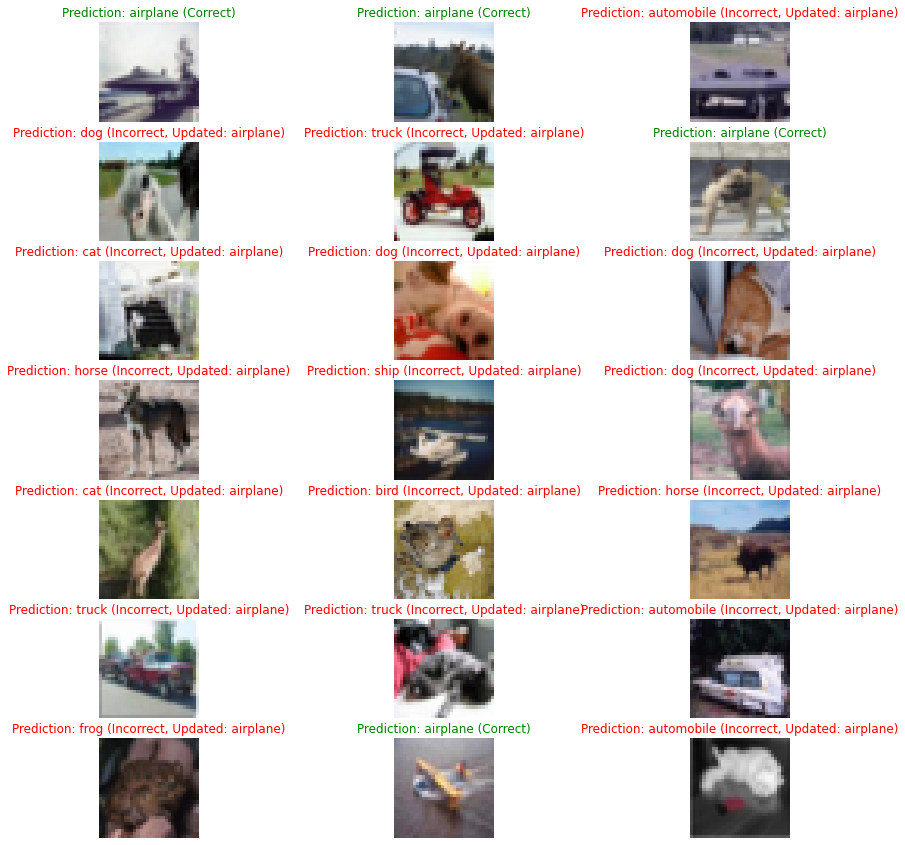

In [148]:
# ÏÉàÎ°úÏö¥ Î†àÏù¥Î∏î Î∞∞Ïó¥ ÏÉùÏÑ±
updated_labels = np.copy(test_labels)

# ÏàòÏ†ïÎêú Î†àÏù¥Î∏îÎ°ú Îç∞Ïù¥ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏
for img_id, new_label in modify_data.items():
    # Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú Î†àÏù¥Î∏î ÏóÖÎç∞Ïù¥Ìä∏
    updated_labels[img_id] = to_categorical(new_label, num_classes=len(class_names))[0]

# Ïù¥ÎØ∏ÏßÄ Î∞è ÏòàÏ∏°/Ïã§Ï†ú ÎùºÎ≤® ÏãúÍ∞ÅÌôî (ÏóÖÎç∞Ïù¥Ìä∏Îêú ÎùºÎ≤® Í∏∞Ï§Ä)
plt.figure(figsize=(15, 15))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    
    # Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
    plt.imshow(selected_images[i])
    plt.axis('off')
    
    # ÏóÖÎç∞Ïù¥Ìä∏Îêú ÎùºÎ≤® ÌëúÏãú
    updated_label = np.argmax(updated_labels[indices_to_visualize[i]])
    
    # ÏòàÏ∏° Î∞è Ïã§Ï†ú ÎùºÎ≤® ÌëúÏãú
    if predicted_labels[i] == updated_label:
        plt.title(f'Prediction: {class_names[predicted_labels[i]]} (Correct)', color='green')
    else:
        plt.title(f'Prediction: {class_names[predicted_labels[i]]} (Incorrect, Updated: {class_names[updated_label]})', color='red')

# ÏÉàÎ°úÏö¥ Î†àÏù¥Î∏î Î∞∞Ïó¥ÏùÑ test_labelsÏóê Ìï†Îãπ
test_labels = updated_labels

plt.show()


- ÎßàÏ∞¨Í∞ÄÏßÄÎ°ú ÏóÖÎç∞Ïù¥Ìä∏Í∞Ä ÏïàÎêòÍ≥† ÏûàÎã§..üòì

In [134]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
average_pooling2d_2 (Average (None, 15, 15, 32)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 15, 15, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
average_pooling2d_3 (Average (None, 6, 6, 64)          0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 6, 6, 64)          256       
_________________________________________________________________
flatten_1 (Flatten)          (None, 2304)             

In [133]:
# Î™®Îç∏ Î°úÎìú
model = models.load_model("cifar10_justmodel.h5")

# Î™®Îç∏ ÌèâÍ∞Ä
model.evaluate(test_images, test_labels)

ValueError: in user code:

    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:1330 test_function  *
        return step_function(self, iterator)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:1320 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:1313 run_step  **
        outputs = model.test_step(data)
    /opt/conda/lib/python3.9/site-packages/keras/engine/training.py:1269 test_step
        self.compiled_loss(
    /opt/conda/lib/python3.9/site-packages/keras/engine/compile_utils.py:201 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    /opt/conda/lib/python3.9/site-packages/keras/losses.py:141 __call__
        losses = call_fn(y_true, y_pred)
    /opt/conda/lib/python3.9/site-packages/keras/losses.py:245 call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.9/site-packages/keras/losses.py:1665 categorical_crossentropy
        return backend.categorical_crossentropy(
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /opt/conda/lib/python3.9/site-packages/keras/backend.py:4839 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    /opt/conda/lib/python3.9/site-packages/tensorflow/python/framework/tensor_shape.py:1161 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1) and (None, 10) are incompatible


- ÎßàÏßÄÎßâ DenseÎ†àÏù¥Ïñ¥ÎèÑ   (None, 10)  Î°ú ÎÇòÏò§Í≥† ÏûàÎäîÎç∞ Ïûò ÏïàÎêòÍ≥† ÏûàÎã§..

In [138]:
# ÏàòÏ†ïÎêú Î†àÏù¥Î∏îÎ°ú Îç∞Ïù¥ÌÑ∞ ÏóÖÎç∞Ïù¥Ìä∏
for img_id, new_label in modify_data.items():
    # Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú Î†àÏù¥Î∏î ÏóÖÎç∞Ïù¥Ìä∏
    test_labels[img_id] = to_categorical(new_label, num_classes=len(class_names))[0]

# # Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú ÏòàÏ∏° ÏàòÌñâ Î∞è Í≤∞Í≥º Ï∂úÎ†• (ÏòµÏÖò)
# for img_id, new_label in modify_data.items():
#     # Ìï¥Îãπ Ïù¥ÎØ∏ÏßÄÏóê ÎåÄÌïú ÏòàÏ∏° ÏàòÌñâ
#     img = test_images[img_id].reshape(1, *test_images[img_id].shape)  # Î™®Îç∏Ïùò ÏûÖÎ†• ÌòïÌÉúÏóê ÎßûÍ≤å reshape
#     predicted_label = np.argmax(model.predict(img), axis=1)[0]

#     # ÏòàÏ∏° Í≤∞Í≥º Ï∂úÎ†•
#     print(f"Image ID: {img_id}, Predicted Label: {class_names[predicted_label]}, True Label: {class_names[new_label]}")


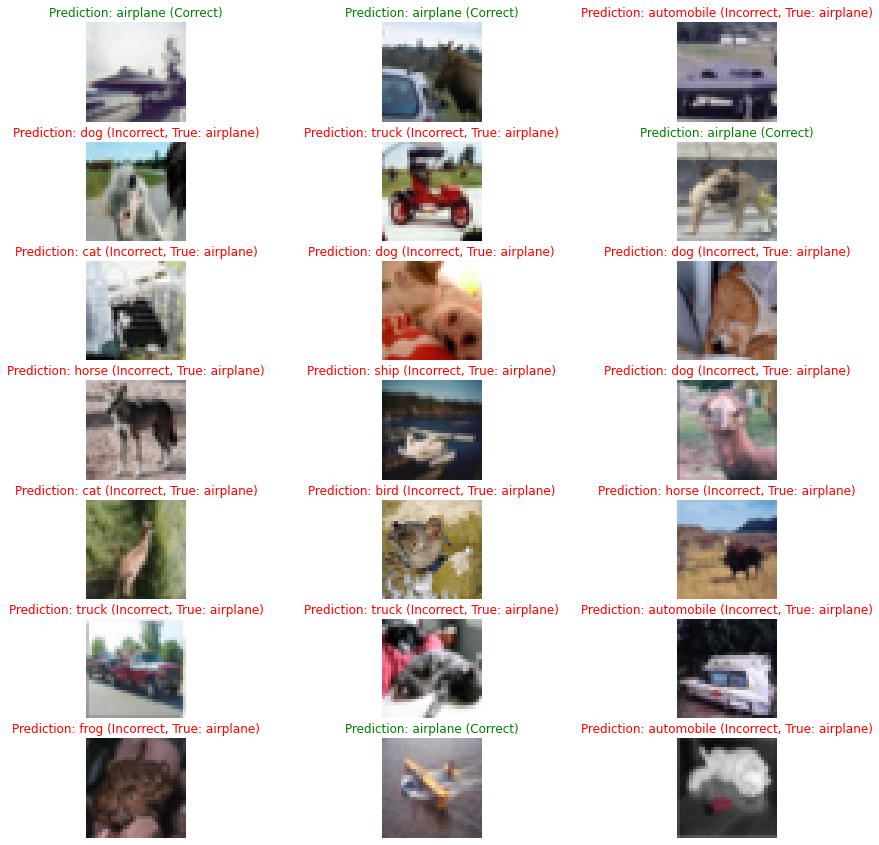

In [130]:
# ÏÑ†ÌÉùÌïú Ïù¥ÎØ∏ÏßÄÏùò Ïù∏Îç±Ïä§
indices_to_visualize = list(modify_data.keys())

# ÏÑ†ÌÉùÌïú Ïù¥ÎØ∏ÏßÄÏôÄ ÎùºÎ≤® Ï∂îÏ∂ú
selected_images = test_images[indices_to_visualize]
true_labels = np.argmax(test_labels[indices_to_visualize], axis=1)

# Î™®Îç∏ÏóêÏÑú ÏòàÏ∏°Ìïú ÎùºÎ≤® Í∞ÄÏ†∏Ïò§Í∏∞
predicted_labels = np.argmax(model.predict(selected_images), axis=1)

# Ïù¥ÎØ∏ÏßÄ Î∞è ÏòàÏ∏°/Ïã§Ï†ú ÎùºÎ≤® ÏãúÍ∞ÅÌôî
num_images = len(indices_to_visualize)
rows = 7  
cols = 3

plt.figure(figsize=(15, 15))

for i in range(num_images):
    plt.subplot(rows, cols, i + 1)
    
    # Ïù¥ÎØ∏ÏßÄ ÌëúÏãú
    plt.imshow(selected_images[i])
    plt.axis('off')
    
    # ÏòàÏ∏° Î∞è Ïã§Ï†ú ÎùºÎ≤® ÌëúÏãú
    if predicted_labels[i] == true_labels[i]:
        plt.title(f'Prediction: {class_names[predicted_labels[i]]} (Correct)', color='green')
    else:
        plt.title(f'Prediction: {class_names[predicted_labels[i]]} (Incorrect, True: {class_names[true_labels[i]]})', color='red')

plt.show()


---

<br>  
<br>  
<br>  
<br>  

## ‚õìÔ∏èÌöåÍ≥†
<br>  

- **Keep**  
    Íµ¨Í∏ÄÎßÅÏùÑ Ïó¥Ïã¨Ìûà ÌñàÎã§.  
    
<br>  

- **Problem**  
    ÌïòÎÇòÎßå ÌñàÏùÑ Îïê Ïûò ÎêòÏóàÎçò Í≤ÉÏù¥ ÎÇòÎ®∏ÏßÄ 21Í∞úÏùò ÏûòÎ™ªÎêú ÎùºÎ≤®ÏùÑ ÏàòÏ†ïÌïòÍ≥† ÏóÖÎç∞Ïù¥Ìä∏ÌïòÎäî Î∂ÄÎ∂ÑÏóêÏÑú ÎßâÌòÄÏÑú Î≠êÍ∞Ä Î¨∏Ï†úÏù∏ÏßÄ Ïïå ÏàòÍ∞Ä ÏóÜÏóàÎã§.. ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌäúÎãùÍπåÏßÄ Ìï† ÏãúÍ∞ÑÏù¥ ÏóÜÏóàÎã§. ÏãúÍ∞ÑÍ≥ÑÏÇ∞ÏùÑ Ïûò ÌñàÏúºÎ©¥ Ïù¥Îü∞ Ï†ÄÎü∞ ÏãúÎèÑÎ•º Ìï¥Î≥º Ïàò ÏûàÏóàÏùÑ ÌÖêÎç∞ ÏïÑÏâΩÎã§.  
    
    <br>  
    
- **Try**  
    Ìè¨Í∏∞ÌïòÏßÄÏïäÏïòÎã§.